Iris Dataset

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [78]:
iris = pd.read_csv('data/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [79]:
iris.shape

(150, 5)

In [80]:
# print columns names
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [81]:
# value count of each species

iris['species'].value_counts() # balanced dataset vs unbalanced
#iris is a balanced dataset of having 50 data points each

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

2-D Scatter Plot

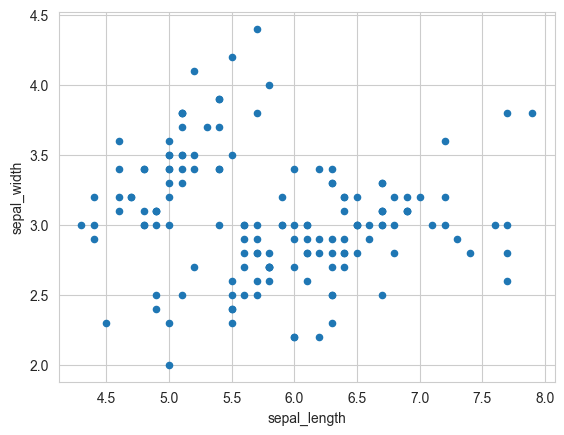

In [82]:
# ALWAYS understand the axis: labels and scale

iris.plot(kind='scatter', x = 'sepal_length', y = 'sepal_width')
plt.show()

# we can't make much sense from the scatter plot
# what if we color the points by their class label/flower type

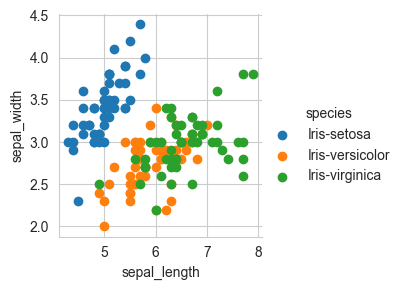

In [83]:
# 2-D scatter plot with color for each flower type/class
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue='species') \
    .map(plt.scatter, 'sepal_length', 'sepal_width') \
        .add_legend()
plt.show()

#FacetGrid -> gives grid structure
#hue -> which column should i color

In [84]:
''''
- notice that the blue points can be easily separated
- whereas orange and green data points can't be easily separated
- can we draw multiple 2-D scatter plots for each combination of features?
- How many combination exist? 4C2 = 6.
'''

"'\n- notice that the blue points can be easily separated\n- whereas orange and green data points can't be easily separated\n- can we draw multiple 2-D scatter plots for each combination of features?\n- How many combination exist? 4C2 = 6.\n"

Pair-Plot

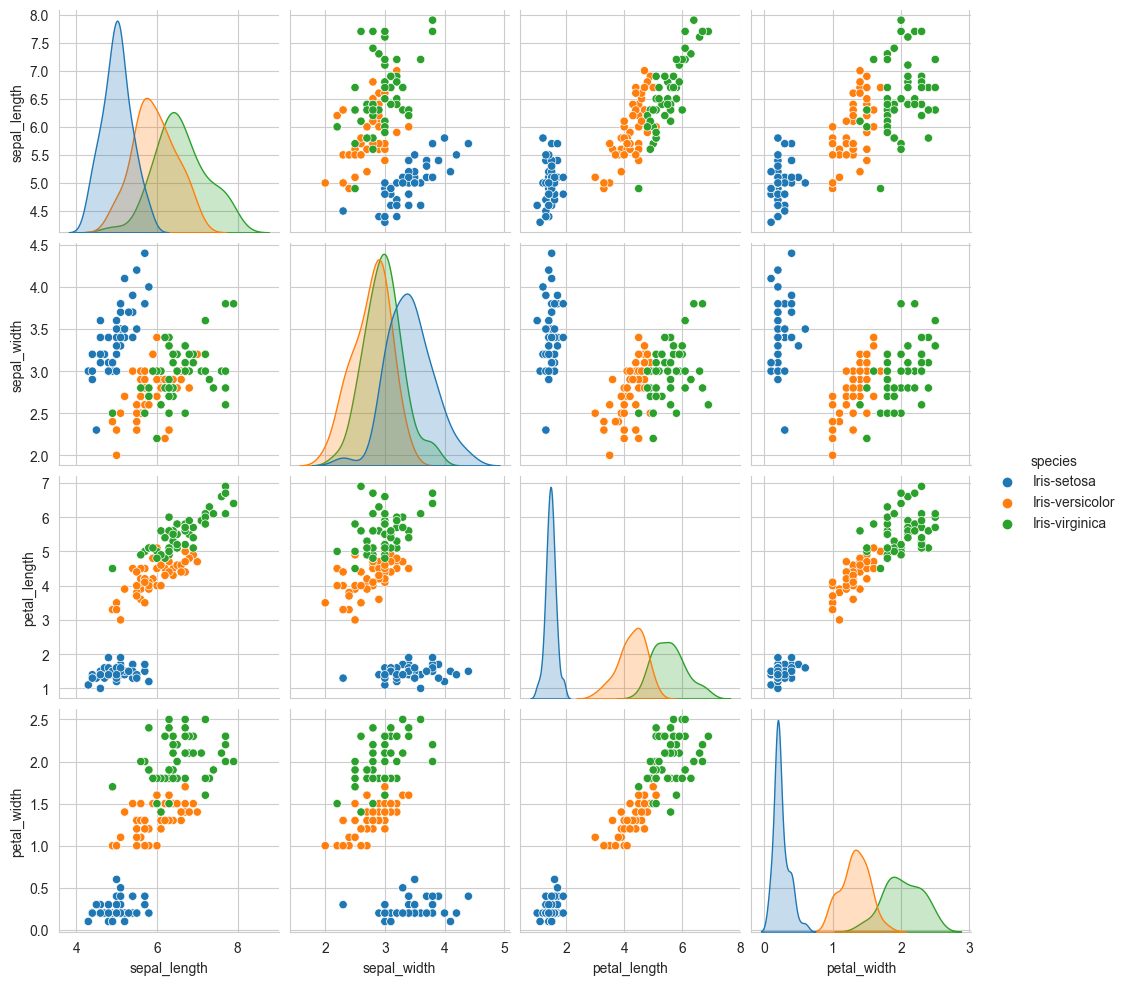

In [85]:
#pair-wise scatter plot
#disadvantage:
# it is used when number of features are high
# cannot visualize higher dimensional patterns in 3-D and 4-D
# only possible to view 2-D pattern

plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris, hue='species')
plt.show()

Conclusion / Observation:
- petal_length and petal_width are the most useful features to identify various flower types.
- while setosa can be easily identified (linearly separable), virginica and versicolor have some overlap (almost linearly separable).
- we cab fine 'lines' and 'if-else' conditions to build a simple model to classify the flower types.

Histogram

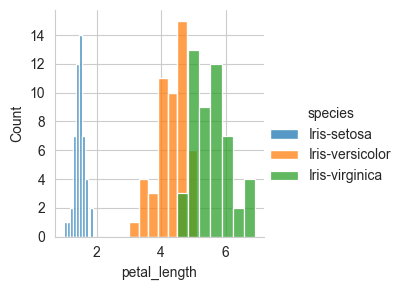

In [86]:
sns.FacetGrid(iris, hue='species')\
    .map(sns.histplot, 'petal_length') \
        .add_legend()
plt.show()

In [87]:
'''
for above hist plot, we can clearly see that setosa species but there is a overlap between the versicolor and virginica.
if pl<=2: 
    setosa
else:
    if pl < 4.7:
        versicolor
    else:
        verginica
'''

'\nfor above hist plot, we can clearly see that setosa species but there is a overlap between the versicolor and virginica.\nif pl<=2: \n    setosa\nelse:\n    if pl < 4.7:\n        versicolor\n    else:\n        verginica\n'

Mean, Variance and Standard deviation

In [88]:
print('Means:')

print(np.mean(iris['petal_length']))

Means:
3.758666666666666


In [89]:
iris.groupby('species').agg(['mean', 'median', 'std'])



sepal_length                  sepal_width                   \
                        mean median       std        mean median       std   
species                                                                      
Iris-setosa            5.006    5.0  0.352490       3.418    3.4  0.381024   
Iris-versicolor        5.936    5.9  0.516171       2.770    2.8  0.313798   
Iris-virginica         6.588    6.5  0.635880       2.974    3.0  0.322497   

                petal_length                  petal_width                   
                        mean median       std        mean median       std  
species                                                                     
Iris-setosa            1.464   1.50  0.173511       0.244    0.2  0.107210  
Iris-versicolor        4.260   4.35  0.469911       1.326    1.3  0.197753  
Iris-virginica         5.552   5.55  0.551895       2.026    2.0  0.274650

'''
    mean - central tendency
    variance - what is the average of square distance of each point from the mean value [how far is a point from mean is variance.]

    variance = 50Ei=1 * (xi - muii)
'''

Box-Plot with Whiskers

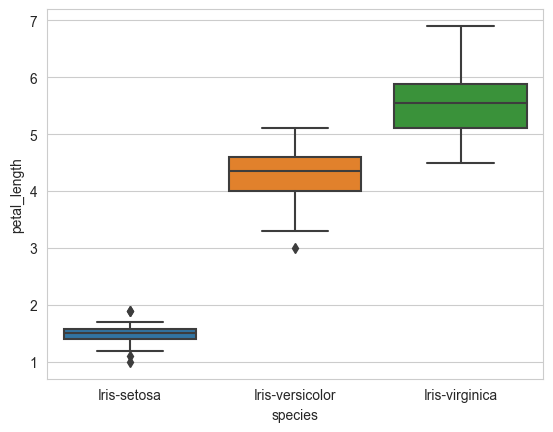

In [90]:
'''
- another way of visualizing 1-D scatter plot is box-plot
- concept of median, percentile, quantile
Percentile:
where do we lie in the sorted list? percentile value is telling us what percent of points are less than the same set
'''

sns.boxplot(x='species', y='petal_length', data=iris)
plt.show()

if petal_length(pl) < 5 & pl > 2:
    versicolor
if pl >= 5:
    virginica

virginica (25 %; lower box line):
- 25 % of pl for virginica which are less than 5
- 25% ERROR

Whiskers:
- the line under the square box [what the cat has]
- one way of drawing whiskers are using min and max values

However, seaborn doesn't use min and max value so, what it takes is, 

whiskers = 1.5 * IQR

IQR = the length of 25% to 75% [which the side of box]

- 50 percentile is median so box plots are taking the ideas of mean, median and quantiles and putting it into the platform.

Violin Plots

- a violin plot combine the benefits of the histogram & PDF and box plot and simplify them
- denser regions of the data are fatter and sparser ones thinner in a violin plot 

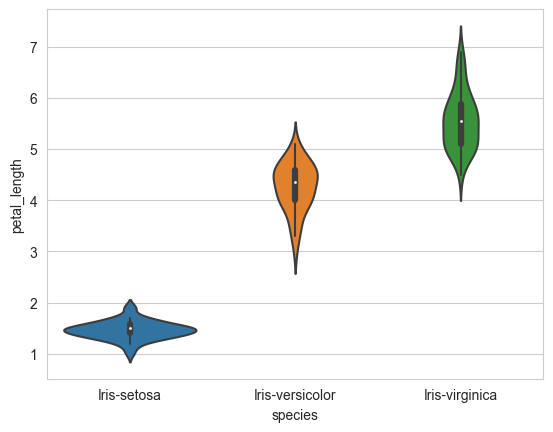

In [91]:
sns.violinplot(x='species', y='petal_length', data=iris, figsize=3)
plt.show()

- what violin plot does is, it plots probability distribution function or probability density function.
- violin plot basically taking both our histogram density plots or probability density plot abd box plot and merging both of them into a single plot.
- it gives ys a distribution looks like Gaussian distribution.

Objective of Iris dataset:
- To classify our flowers into Setosa, Virginica and Versicolor

In [ ]:
''''
Contour Plot:
- circle represents all the points have same height
- is a multivariate probability density
- 2D density
'''

C:\Users\rmans\AppData\Local\Temp\ipykernel_3292\2603129475.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=iris.petal_length, y=iris.petal_width, cmap="Reds", shade=True, bw_adjust=.5)


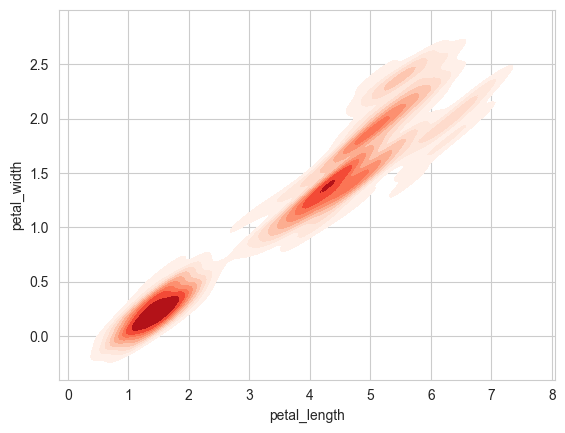

In [100]:

# custom the color, add shade and bandwidth
sns.kdeplot(x=iris.petal_length, y=iris.petal_width, cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

C:\Users\rmans\AppData\Local\Temp\ipykernel_3292\272072474.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=iris.petal_length, y=iris.petal_width, cmap="Blues", shade=True, thresh=0)


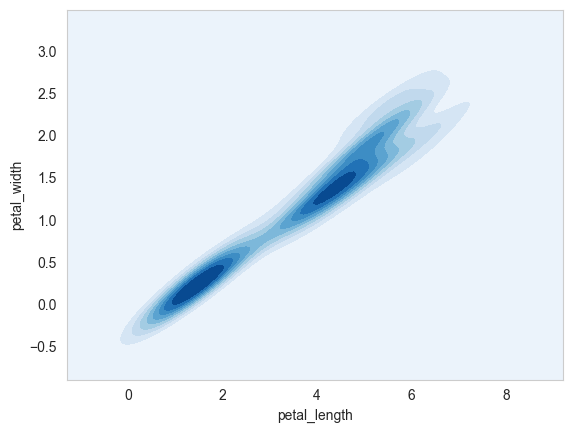

In [98]:
# add thresh parameter
sns.kdeplot(x=iris.petal_length, y=iris.petal_width, cmap="Blues", shade=True, thresh=0)
plt.show()

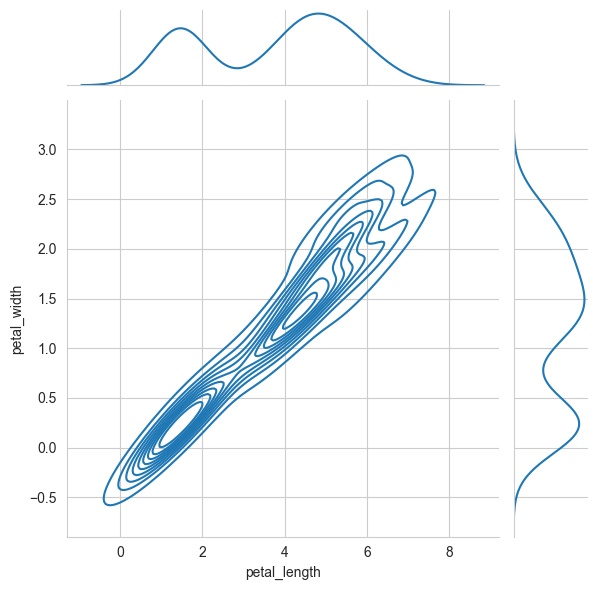

In [99]:
# 2D density plot
sns.jointplot(x=iris.petal_length, y=iris.petal_width, data=iris_setosa, kind='kde')
plt.show()